# Deep Learning: Ex.6 - **Transfer Learning**

Submitted by: Noam Bassat 308465434


In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


### categorical_crossentropy

2.4.1


***
### 1. Create the model

Load the pre-trained VGG16 model without its "classifier top".

- Create a new `Sequential` model
- add the VGG16 (without its "top") as the new model's first layer
- add a new "top": `Flatten`(), 256-`Dense` (ReLU), `Dropout`(0.5), 17-`Dense` (Softmax)
- freeze the weights in the first layer (of the new model (= the pre-trained VGG16 model)
- print the model summary
- how many trainable parameters you have?

In [ ]:

vgg16 = tf.keras.applications.VGG16(input_shape=(224,224,3),
                                               include_top=False)



model = Sequential(vgg16)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))
model.layers[0].trainable = False
model.summary() # 6,427,153 trainable parameters


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               6422784   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 17)                4369      
Total params: 21,141,841
Trainable params: 6,427,153
Non-trainable params: 14,714,688
_________________________________________________________________


2. Train the new "top"
Train the new model (with the frozen VGG layers) over the flower-17 dataset.

Dataset: either download the dataset from the Moodle link, or if using google colab, use:

!git clone https://github.com/rubinj/Flowers-17.git

Use data augmentation for the training. Remeber to rescale the images rescale=1./255 and to set the target_size of the images to (224,224).

Note: you will need to rescale the testing images (for validation) as well. However, we do not use data augmentation of the testing images (we validate our models on the original testing images, no need to generate more of them). To this aim, create another ImageDataGenerator for the testing images using only the rescale=1./255 option.

(using RMSProp you should get 80-90% validatation accuaracy in 20-30 epochs..)

Plot loss and accuracy plots (for both train and validation).


In [ ]:
!git clone https://github.com/rubinj/Flowers-17.git

fatal: destination path 'Flowers-17' already exists and is not an empty directory.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

x_batch, y_batch = train_generator.next()
train_generator = dataGen.flow_from_directory('Flowers-17/train', target_size=(224,224), batch_size=32)
dataGen = ImageDataGenerator(rescale=1./255)
test_generator = dataGen.flow_from_directory('Flowers-17/validation', target_size=(224,224), batch_size=32)


Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [ ]:
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator, epochs=29,
                    validation_data=(test_generator))

Epoch 1/29
38/38 [==============================] - 19s 486ms/step - loss: 5.8206 - accuracy: 0.1194 - val_loss: 1.7648 - val_accuracy: 0.4529
Epoch 2/29
38/38 [==============================] - 18s 479ms/step - loss: 2.3902 - accuracy: 0.2656 - val_loss: 1.4303 - val_accuracy: 0.5471
Epoch 3/29
38/38 [==============================] - 18s 481ms/step - loss: 1.9277 - accuracy: 0.3906 - val_loss: 1.1616 - val_accuracy: 0.7118
Epoch 4/29
38/38 [==============================] - 19s 497ms/step - loss: 1.6962 - accuracy: 0.4679 - val_loss: 0.8249 - val_accuracy: 0.7176
Epoch 5/29
38/38 [==============================] - 19s 500ms/step - loss: 1.3718 - accuracy: 0.5533 - val_loss: 1.0118 - val_accuracy: 0.6294
Epoch 6/29
38/38 [==============================] - 19s 495ms/step - loss: 1.2447 - accuracy: 0.5970 - val_loss: 0.6657 - val_accuracy: 0.7882
Epoch 7/29
38/38 [==============================] - 19s 489ms/step - loss: 1.1559 - accuracy: 0.6329 - val_loss: 0.5081 - val_accuracy: 0.8294

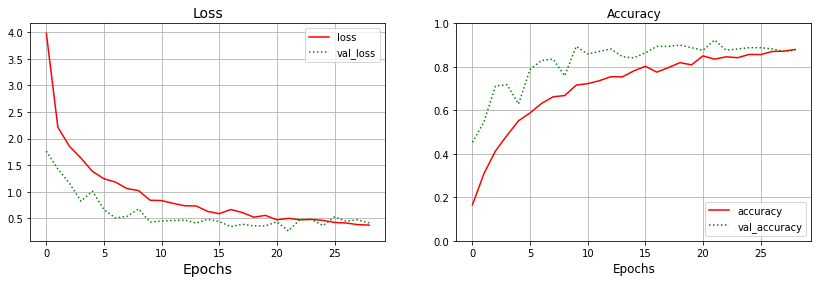

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],':g')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(('loss','val_loss'))
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],':g')
plt.ylim([0, 1])
plt.legend(('accuracy','val_accuracy'))
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

***
### 3. Fine tune all params

At this point, you can 'unfreeze' the VGG layers and continue the training process (with slower learning rate) to get better results.

(using `SGD(lr=0.0001, momentum=0.9)` you should get over 90% validatation accuaracy in 20-30 epochs..)

Remember to recompile your model, in order to the changes to take effect.

Plot loss and accuracy plots (for both train and validation).

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0001, momentum=0.9)
model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(train_generator, epochs=20,
                    validation_data=(test_generator))

Epoch 1/20
38/38 [==============================] - 20s 498ms/step - loss: 0.3123 - accuracy: 0.8900 - val_loss: 0.3614 - val_accuracy: 0.9000
Epoch 2/20
38/38 [==============================] - 19s 488ms/step - loss: 0.2320 - accuracy: 0.9289 - val_loss: 0.3478 - val_accuracy: 0.9059
Epoch 3/20
38/38 [==============================] - 19s 486ms/step - loss: 0.2187 - accuracy: 0.9188 - val_loss: 0.3390 - val_accuracy: 0.9059
Epoch 4/20
38/38 [==============================] - 18s 484ms/step - loss: 0.1886 - accuracy: 0.9311 - val_loss: 0.3360 - val_accuracy: 0.9118
Epoch 5/20
38/38 [==============================] - 18s 482ms/step - loss: 0.1705 - accuracy: 0.9486 - val_loss: 0.3378 - val_accuracy: 0.9176
Epoch 6/20
38/38 [==============================] - 18s 484ms/step - loss: 0.1702 - accuracy: 0.9431 - val_loss: 0.3371 - val_accuracy: 0.9118
Epoch 7/20
38/38 [==============================] - 18s 483ms/step - loss: 0.1857 - accuracy: 0.9418 - val_loss: 0.3305 - val_accuracy: 0.9118

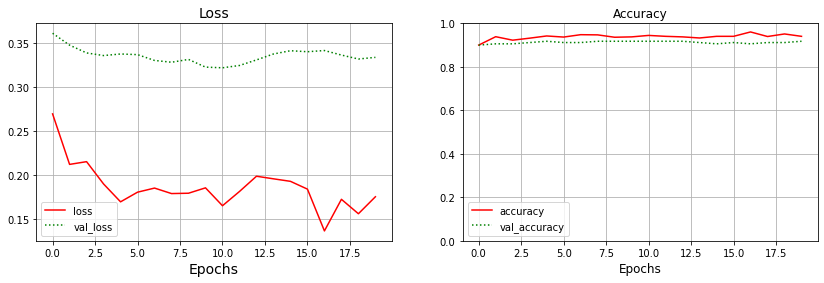

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],':g')
plt.title('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(('loss','val_loss'))
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],':g')
plt.ylim([0, 1])
plt.legend(('accuracy','val_accuracy'))
plt.title('Accuracy',fontsize=12)
plt.xlabel('Epochs',fontsize=12)
plt.grid()

***
## Good Luck!